### Fill out:
Name & Surname: Brian Hermawan

Student ID: 34370560

## W1&W2 post studio exercises (revision, kNN)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to answer the questions stated in the exercises in markdown cell. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

For these exercises you will use the `penguins` dataset from seaborn. Load it using load_dataset().

In [1]:
# as there were warnings about future changes so far non-affecteing our calculations - we'll import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Exercise 1 (cleaning, plotting)

First, create a numerical code for classification rather than using the string value of `species` (add column named, e.g., `code`). 

We will be using columns `flipper length`, `bill depth`, `species`, `code`; drop rows that have at least one missing value in any of these columns. Hint: dropna() and play around with its parameters such as subset etc.

Next, create:

- a feature array which consists of the `flipper length` and `bill depth` (**show first 5 rows**), 

- a target (i.e., Y or outcome) series which consists of the species `code` (**show first 5 values**),

- and an array which contains unique values of species names (**show all**). 

Also, **plot a scatter plot** of the feature array against the target series (include legend). Hint: Plot flipper length against bill depth and colour according to `target series` - label will have 3 levels: 0,1,2. If you would like scatterplot with species names - use penguins column `species`.)

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

In [5]:
# Create a numerical code for species
penguins['code'] = penguins['species'].astype('category').cat.codes

# Display the unique species and their corresponding codes
species_codes = dict(enumerate(penguins['species'].astype('category').cat.categories))
species_codes

{0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

In [8]:
# Drop rows with missing values in the specified columns
penguins_cleaned = penguins.dropna(subset=['flipper_length_mm', 'bill_depth_mm', 'species', 'code'])

# Create the feature array
features = penguins_cleaned[['flipper_length_mm', 'bill_depth_mm']].values

# Create the target series
target = penguins_cleaned['code'].values

# Get the unique species names
unique_species = penguins_cleaned['species'].unique()

# Display the first 5 rows of the feature array, the first 5 values of the target series, and the unique species names
features[:5], target[:5], unique_species


(array([[181. ,  18.7],
        [186. ,  17.4],
        [195. ,  18. ],
        [193. ,  19.3],
        [190. ,  20.6]]),
 array([0, 0, 0, 0, 0], dtype=int8),
 array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object))

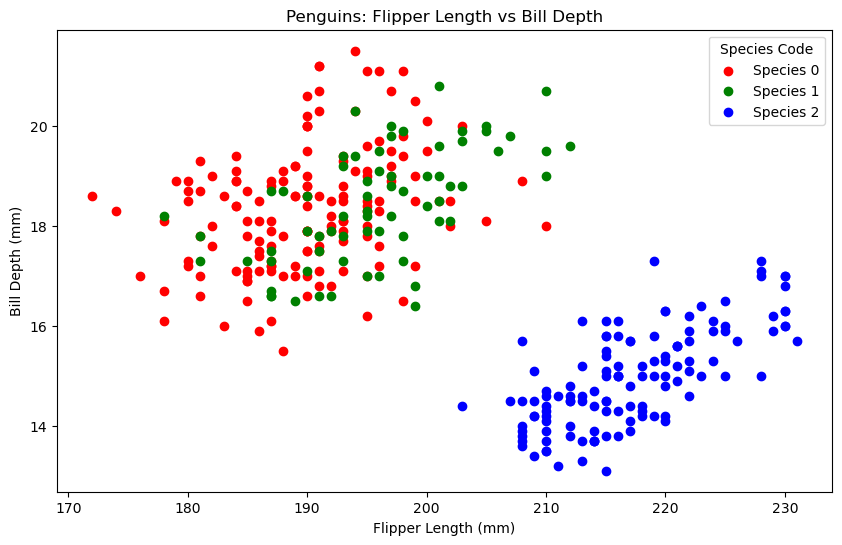

In [9]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Define the colors for the scatter plot
colors = {0: 'red', 1: 'green', 2: 'blue'}

# Plot the scatter plot
for code, color in colors.items():
    plt.scatter(penguins_cleaned[penguins_cleaned['code'] == code]['flipper_length_mm'],
                penguins_cleaned[penguins_cleaned['code'] == code]['bill_depth_mm'],
                c=color, label=f'Species {code}')

# Add labels and legend
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Penguins: Flipper Length vs Bill Depth')
plt.legend(title='Species Code')
plt.show()


### Exercise 2 (kNN - raw data)

Split the data into training and testing set, with and 80:20 split, random state equal to 0. Create a kNN model with 10 nearest neighbours and uniform weights. Train (fit) model on training data. Calculate predictions for feature values in testing set (**show first 5 entries**). **Print accuracy** (import from sklearn.metrics) and **plot confusion matrix** using function from the pre-studio notebook.

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Create a numerical code for species
penguins['code'] = penguins['species'].astype('category').cat.codes

# Drop rows with missing values in the specified columns
penguins_cleaned = penguins.dropna(subset=['flipper_length_mm', 'bill_depth_mm', 'species', 'code'])

# Create the feature array and target series
X = penguins_cleaned[['flipper_length_mm', 'bill_depth_mm']].values
y = penguins_cleaned['code'].values
categories = penguins_cleaned['species'].unique()

# Split the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Create and train the kNN model
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf.fit(X_train, y_train)

# Calculate predictions for feature values in the testing set
y_pred = clf.predict(X_test)

# Display the first 5 predictions
print("First 5 predictions:", y_pred[:5])


First 5 predictions: [0 2 1 2 1]


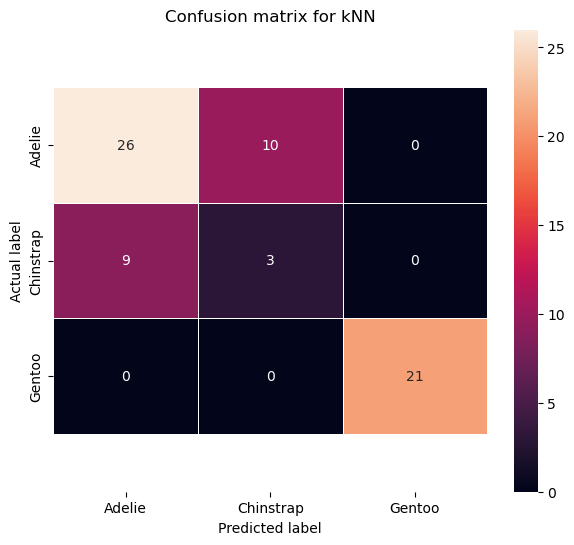

Accuracy: 0.725


In [12]:
def plt_confusion_matrix(cnf_matrix, cats, method):
    """
    Given actual target values and predicted values for a classifier 'method', 
    plots the confusion matrix.
    """
    # Write the confusion matrix to a dataframe with row and column names as the categories
    cmatrix = pd.DataFrame(cnf_matrix, columns=cats, index=cats)
    f, ax = plt.subplots(figsize=(7,6)) # Initialise the plots and axes
    sns.heatmap(cmatrix, annot=True, linewidths=.5) # Plot the confusion matrix as a heatmap
    plt.title('Confusion matrix for ' + method) # Add a title
    plt.ylabel('Actual label') # Add a ylabel
    plt.xlabel('Predicted label') # Add a xlabel
    # Adjust the bottom and top of the figure, so we can view all of it
    bottom, top = ax.get_ylim()  # Get the y axis limits
    ax.set_ylim(bottom + 0.5, top - 0.5) # Adjust the y axis limits
    plt.show()

# Create the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt_confusion_matrix(cnf_matrix, categories, 'kNN')

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", np.round(accuracy, 3))


### Exercise 3 (normalisation, plotting)

Our features have quite different variance. Let's see, whether accuracy of kNN model can improve by normalising the the feature array. Divide data in feature array by its standard deviation, **show first 5 rows** and **plot scatterplot of flipper length against bill_depth coloured according to code (or species).**

In [16]:
# Normalize the feature array by dividing each feature by its standard deviation
penguin_normalized = X / np.std(X, axis=0)

# Display the first 5 rows of the normalized feature array
print("First 5 rows of normalized feature array:\n", penguin_normalized[:5])

First 5 rows of normalized feature array:
 [[12.89069069  9.48322067]
 [13.24678712  8.82395934]
 [13.88776069  9.1282338 ]
 [13.74532212  9.78749513]
 [13.53166426 10.44675646]]


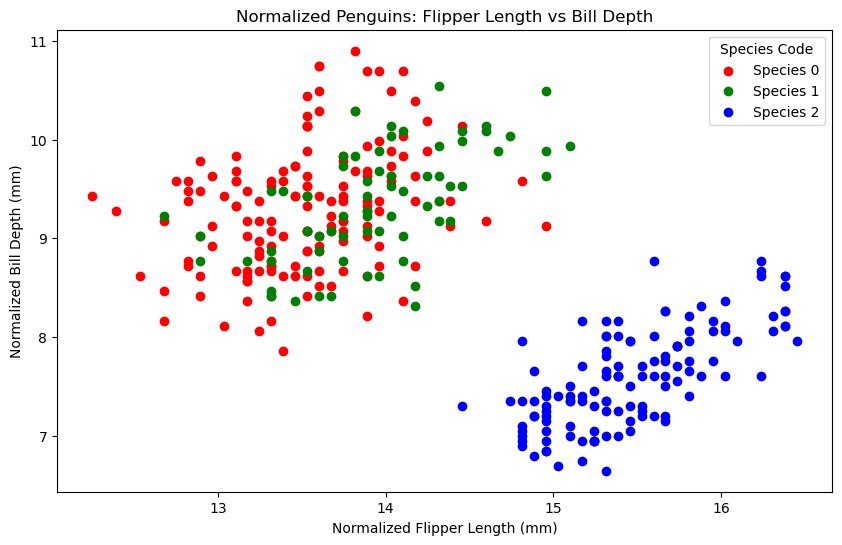

In [17]:
# Plot the scatterplot of flipper length against bill depth, colored by species code
plt.figure(figsize=(10, 6))

# Define the colors for the scatter plot
colors = {0: 'red', 1: 'green', 2: 'blue'}

# Plot the scatter plot with normalized data
for code, color in colors.items():
    plt.scatter(penguin_normalized[y == code, 0], penguin_normalized[y == code, 1], c=color, label=f'Species {code}')

# Add labels and legend
plt.xlabel('Normalized Flipper Length (mm)')
plt.ylabel('Normalized Bill Depth (mm)')
plt.title('Normalized Penguins: Flipper Length vs Bill Depth')
plt.legend(title='Species Code')
plt.show()


### Exercise 4 (kNN - normalised data)

Repeat Ex 2 on normalised data created in Ex 3. **Show accuracy score, plot confusion matrix. Did the accuracy score improve?**

First 5 predictions with normalized data: [0 2 1 2 0]


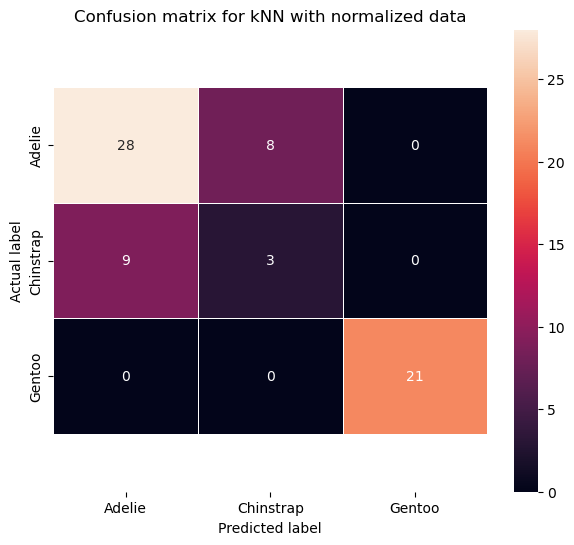

Accuracy with normalized data: 0.754


In [18]:
# Split the normalized data into training and testing sets (80:20 split)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_normalized, y, train_size=0.8, random_state=0)

# Create and train the kNN model with normalized data
clf_norm = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf_norm.fit(X_train_norm, y_train)

# Calculate predictions for feature values in the testing set
y_pred_norm = clf_norm.predict(X_test_norm)

# Display the first 5 predictions
print("First 5 predictions with normalized data:", y_pred_norm[:5])

# Create the confusion matrix for the normalized data
cnf_matrix_norm = confusion_matrix(y_test, y_pred_norm)

# Plot the confusion matrix for the normalized data
plt_confusion_matrix(cnf_matrix_norm, categories, 'kNN with normalized data')

# Calculate and print the accuracy score for the normalized data
accuracy_norm = accuracy_score(y_test, y_pred_norm)
print("Accuracy with normalized data:", np.round(accuracy_norm, 3))

This is an improvement from the Accuracy of 0.725 in exercise 2
